In [1]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


This is **Part A** till the **Part B** text appears later down the order.

*   Three convolutional layers with 32, 64, 64 filters respectively
*   2 pooling layers
*   15 epochs





In [5]:
batch_size = 128
num_classes = 10
epochs = 15

img_rows, img_cols = 28, 28


(x_train, y_train), (x_test, y_test) = mnist.load_data()

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=2, write_graph=True, write_images=True)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Part B:** A callback to the tensorboard via keras is given by adding a callback "tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=2, write_graph=True, write_images=True)" in the fit function.


Error vs Epochs graph is given down below, showing a clear reduction in training error over time


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.2001 - acc: 0.9364 - val_loss: 0.0466 - val_acc: 0.9862
Epoch 2/15
60000/60000 [==============================] - 13s 212us/step - loss: 0.0509 - acc: 0.9842 - val_loss: 0.0266 - val_acc: 0.9906
Epoch 3/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0367 - acc: 0.9889 - val_loss: 0.0257 - val_acc: 0.9915
Epoch 4/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.0271 - acc: 0.9917 - val_loss: 0.0227 - val_acc: 0.9924
Epoch 5/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0276 - val_acc: 0.9908
Epoch 6/15
60000/60000 [==============================] - 13s 211us/step - loss: 0.0172 - acc: 0.9950 - val_loss: 0.0223 - val_acc: 0.9938
Epoch 7/15
60000/60000 [==============================] - 13s 212us/step - loss: 0.0158 - acc: 0.9952 - val_loss: 0.

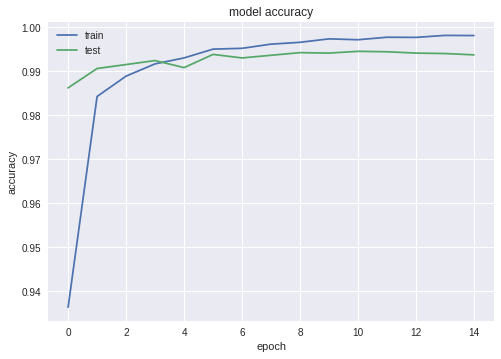

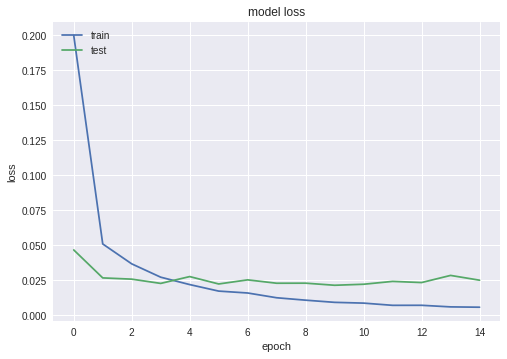

In [6]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
                   callbacks=[tbCallBack])
score = model.evaluate(x_test, y_test, verbose=0)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
LOG_DIR = 'Graph'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
# Install
! npm install -g localtunnel

# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

# Get url
! cat url.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.1
added 54 packages from 31 contributors in 4.492s
your url is: https://sour-catfish-42.localtunnel.me
